## Loading data from csv files

##### load the metadata along with metrics. Features like danceability and accousticness is also scaled from 1 to -1

In [1]:
import pandas as pd

#data (track metadata) with genre label
tracks = pd.read_csv("datasets/fma-rock-vs-hiphop.csv")

#data (track metrics) with features
echonest_metrics = pd.read_json("datasets/echonest-metrics.json" , precise_float=True)



C:\Users\Sadii\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sadii\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#merge relevant columns from tracks and metrics
echo_tracks = echonest_metrics.merge(tracks[['genre_top','track_id']],on='track_id')

echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [3]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


#### see correation between columns of echonest_metrics

In [4]:
corr = echonest_metrics.corr() #get correlation
corr.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1,-0.279829,0.102056,0.121991,-0.283206,-0.00405934,-0.0750767,0.004313,0.0202007
acousticness,-0.279829,1,-0.189599,-0.477273,0.110033,0.0413193,0.0387845,-0.110701,-0.0854362
danceability,0.102056,-0.189599,1,0.0453446,-0.118033,-0.143339,0.171311,-0.0943519,0.428515
energy,0.121991,-0.477273,0.0453446,1,-0.00241179,0.0457524,-0.00864488,0.227324,0.219384
instrumentalness,-0.283206,0.110033,-0.118033,-0.00241179,1,-0.0585932,-0.216689,0.0230032,-0.1452
liveness,-0.00405934,0.0413193,-0.143339,0.0457524,-0.0585932,1,0.0731041,-0.00756641,-0.0178859
speechiness,-0.0750767,0.0387845,0.171311,-0.00864488,-0.216689,0.0731041,1,0.0321876,0.0947941
tempo,0.004313,-0.110701,-0.0943519,0.227324,0.0230032,-0.00756641,0.0321876,1,0.129911
valence,0.0202007,-0.0854362,0.428515,0.219384,-0.1452,-0.0178859,0.0947941,0.129911,1


### Normalizing the feature data by doing standard scalling

In [5]:
#get features by dropping the column track_id and genre_top
features = echo_tracks.drop(columns = ['genre_top' , 'track_id'])

features.head(5)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018


In [17]:
#define label
labels = echo_tracks['genre_top']
labels #it is data series

0       Hip-Hop
1       Hip-Hop
2       Hip-Hop
3       Hip-Hop
4          Rock
         ...   
4797    Hip-Hop
4798    Hip-Hop
4799    Hip-Hop
4800    Hip-Hop
4801    Hip-Hop
Name: genre_top, Length: 4802, dtype: object

In [7]:
#Do standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [8]:
scaled_train_features

array([[-0.19121034,  1.30442004,  0.03831594, ...,  0.37303429,
         1.15397908,  0.46228696],
       [-0.30603598,  0.50188641,  0.78817624, ...,  2.44615517,
         0.00791367, -0.69081137],
       [-1.20481276,  1.68413943,  0.31285194, ...,  0.13513049,
        -0.77731688,  0.63107745],
       ...,
       [-1.29470431,  1.17682795,  0.13265633, ...,  0.85182206,
        -0.93541008, -0.07941825],
       [-1.13869115, -0.02253433,  0.57117905, ...,  1.40951543,
         1.31301348,  0.47513794],
       [-0.90611434,  1.10148973,  0.56322452, ...,  1.36030881,
        -1.43669053,  0.76217464]])

### now fit scaled_train_features on PCA (Principal Component Analysis)

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

C:\Users\Sadii\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
# get all explained variance ratios from pca of all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_


Text(0.5, 0, 'Principal Component Analysis')

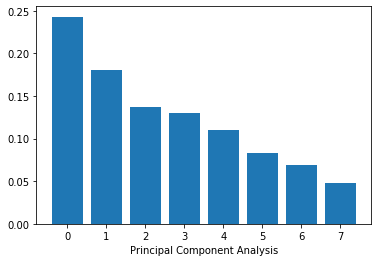

In [11]:
# plot the bar graph of explained_variance
fig , ax=plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel("Principal Component Analysis")

### Doing Cummilative variance to get more info about how much no.of components to use

In [12]:
import numpy as np

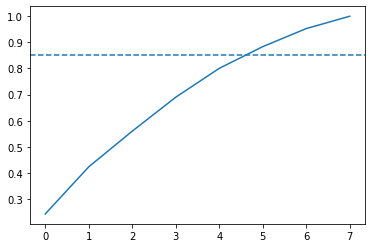

In [13]:
cum_exp_variance = np.cumsum(exp_variance) #calculate cummulative variance

#plot the cum_exp_variance
fig , ax=plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85,linestyle='--') #0.85 coz we want 85% variance data
n_components = 6 #as we have 7 components so 85% is 6


In [14]:
#perform pca with chosen no of componets and project data on components
pca= PCA(n_components,random_state=0)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

### Applying Decision Tree

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [31]:
#Split the data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,random_state=10)

In [32]:
#Train the model
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [33]:
# Predict the labels of test
pred_labels_tree = tree.predict(test_features)

pred_labels_tree

array(['Rock', 'Rock', 'Rock', ..., 'Rock', 'Hip-Hop', 'Rock'],
      dtype=object)

###  Compare the predictions with the actual data

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,pred_labels_tree))


0.8434637801831807


### Applying Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
log = LogisticRegression(random_state=10)
log.fit(train_features,train_labels)

pred_labels_log = log.predict(test_features)



C:\Users\Sadii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
print(accuracy_score(test_labels,pred_labels_log))

0.8784346378018318


#### Classification Report

In [38]:
from sklearn.metrics import classification_report

class_rep_tree = classification_report(test_labels,pred_labels_tree)
class_rep_log = classification_report(test_labels,pred_labels_log)

In [39]:
print("Decission Tree: ",class_rep_tree)
print("Logistic Regression: ",class_rep_log)

Decission Tree:                precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression:                precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



### Balancing our data (to have better classification)

In [41]:
# extract the only hiphop and rock data from echo_tracks
hop_only = echo_tracks.loc[echo_tracks['genre_top']=='Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top']=='Rock']

In [44]:
print(hop_only.shape,rock_only.shape)

(910, 10) (3892, 10)


In [46]:
# have equal no. of both data 
rock_only = rock_only.sample(hop_only.shape[0],random_state=10)

In [48]:
#Concatenate the hop_only and rock_only data
rock_hop_only = pd.concat([rock_only,hop_only])


In [49]:
features = rock_hop_only.drop(['genre_top','track_id'],axis=1)
labels = rock_hop_only['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))


In [50]:
# Now again train and spilt the train and test data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,labels,random_state=10)

### Now apply the above models

In [56]:
# Train on Decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)
pred_labels_tree = tree.predict(test_features)

In [57]:
# Train on Logistic Regression
log = LogisticRegression(random_state=10)
log.fit(train_features,train_labels)
pred_labels_log = log.predict(test_features)

C:\Users\Sadii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
print("Decission Tree: \n",classification_report(test_labels,pred_labels_tree))
print("Logistic Regression: \n",classification_report(test_labels,pred_labels_log))

Decission Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



###  Cross Validation on models

In [59]:
from sklearn.model_selection import KFold,cross_val_score

In [60]:
#Set up K-fol variable
kf = KFold(10)
tree = DecisionTreeClassifier(random_state=10)
log = LogisticRegression(random_state=10)

In [61]:
#Train the model using kfold
tree_score = cross_val_score(tree,pca_projection,labels,cv=kf)
log_score = cross_val_score(log,pca_projection,labels,cv=kf)

C:\Users\Sadii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sadii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sadii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sadii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sadii\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [62]:
print('Decision Tree:',np.mean(tree_score))
print('Logistic Regression',np.mean(log_score))

Decision Tree: 0.7489010989010989
Logistic Regression 0.782967032967033
